<h1>Hate Speech Detector</h1>
<h3>CS/CSYS/STAT 287 Data Science</h3>
<h4>Data analysis</h4>
<h4>Aviral Chawla, Daniel Orem, Jay Hwasung Jung, Shunsuke Miyazato</h4>
---------------------------------------------------------------------------------------

In [1]:
# loading in modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# file path and initialize processed data
PATH_TO_GOOGLE_PERSPECTIVE_RESTULT = "./out_2.csv"
imported_data = pd.read_csv(PATH_TO_GOOGLE_PERSPECTIVE_RESTULT)

In [3]:
# overview of data
print(len(imported_data))
imported_data.set_index('Unnamed: 0')

47436


,text,id,author,created_utc,score,subreddit,TOXICITY,INSULT,THREAT
Unnamed: 0,,,,,,,,,
0,the simplest response is so female victims of ...,8g5sxr,JohnKimble111,1525148826,40,MensRights,0.255384,0.077453,0.009282
1,kotakuinaction scum are imbeciles who go after...,8g5zag,lpoop789,1525150942,1,MensRights,0.911035,0.829747,0.348043
2,if women were oppressed in the west until quit...,8g644k,danielmd92,1525152596,133,MensRights,0.132146,0.026960,0.010835
3,i use cards with reddit is fun a reddit app fr...,8g6ynw,lpoop789,1525164358,357,MensRights,0.021668,0.009451,0.008091
4,i find that i run into this argument a lot whe...,8g7568,JackFisherBooks,1525166725,20,MensRights,0.165919,0.060232,0.013321
...,...,...,...,...,...,...,...,...,...
47431,tye world trade centre ordered pepperoni pizza...,mjwnaq,MarxistClassicide,1617544457,2,GenZedong,0.051563,0.017013,0.007586
47432,he died after getting pinned,mjwsuo,Irrelevant-Lizard,1617544977,1,GenZedong,0.247637,0.035774,0.163835
47433,a place for r darkmememe members to chat with ...,mjwt6d,Gigadweeb,1617545005,1,GenZedong,0.044636,0.016557,0.008453


In [4]:
# keys for the dataframe
print(imported_data.keys())

Index(['Unnamed: 0', 'text', 'id', 'author', 'created_utc', 'score',
       'subreddit', 'TOXICITY', 'INSULT', 'THREAT'],
      dtype='object')


In [5]:
# retrieve example of one insult
print('Insult Score Example')
print('text:   ' + imported_data[imported_data['INSULT'] > 0.65].iloc[10]['text'])
print('scores: ' + str(imported_data[imported_data['INSULT'] > 0.65].iloc[10]['INSULT']))

Insult Score Example
text:   this isn t r pussypass i was led to believe this sub was about men s issues that get overlooked by todays politics and society not the dumb bitch deserved it she accused him of sexual assault falsely
scores: 0.65129566


In [6]:
# get datasets of insult, toxicity, and threat higher than probabiliy 0.65 (it can be changed)
insult_df = imported_data[imported_data['INSULT'] > 0.65]
toxicity_df = imported_data[imported_data['TOXICITY'] > 0.65]
threat_df = imported_data[imported_data['THREAT'] > 0.65]

In [7]:
# overview of these dataframes
print('INSULT:   ' + str(len(insult_df)))
print('TOXICITY: ' + str(len(toxicity_df)))
print('THREAT:   ' + str(len(threat_df)))

INSULT:   416
TOXICITY: 3234
THREAT:   11


In [8]:
# sample author who insults
print(insult_df.iloc[6]['author'])

Bryzar


In [9]:
# sample author's data
print(toxicity_df[toxicity_df['author'] == 'Bryzar'])

     Unnamed: 0                                               text      id  \
747         747  idiots like this one are exactly why i am so s...  8n613d   

     author  created_utc  score   subreddit  TOXICITY    INSULT    THREAT  
747  Bryzar   1527657675     26  MensRights  0.776108  0.755201  0.020437  


In [10]:
# find the author who posts hatespeech-toxicity the most frequent
print(toxicity_df.groupby(['author'])['author'].count().sort_values(ascending=False))

author
TheAndredal      53
JohnKimble111    44
EricAllonde      34
Imnotmrabut      32
benderXX         29
                 ..
NewsinAsia        1
New-Grape2052     1
NesVier           1
Neroke2016a       1
zzzsoebre         1
Name: author, Length: 2160, dtype: int64


In [25]:
# find the author who posts hatespeech-toxicity the most frequent
print(toxicity_df.groupby(['subreddit'])['subreddit'].count().sort_values(ascending=False))

subreddit
MensRights    2066
GenZedong     1031
TheRedPill     137
Name: subreddit, dtype: int64


In [11]:
# one of the posts that 'TheAndredal' wrote
print(toxicity_df[toxicity_df['author'] == 'TheAndredal']['text'].iloc[34])

i went to a concert recently and saw a girl i had hooked up with prior she was great in bed so i was taking cigs off her for minutes while we caught up if i didn t find anyone else that night i would go home with her next i saw another girl i had hooked up with prior said hi thought nothing of it saw a smoke show blonde and approached her and was dancing with her and she was borderline fucking me on the dance floor while we were making out hard girl two was nearby watching this all go down the night was coming to an end and i told her i d call the uber to my place she gives some bullshit excuse that she had a flight to catch in the morning and that she was just visiting her friends for the weekend wasn t able to get her to ditch her friends unfortunately next i m waiting in the parking lot trying to catch an uber and girl number two shows up i remember she lives next to me and i tell her to call us an uber back to her place she gives me shit about making out with a girl in front of her

In [12]:
sample_df_TheAndredal = toxicity_df[toxicity_df['author'] == 'TheAndredal'][['text','TOXICITY','created_utc']]

In [13]:
print(datetime.fromtimestamp(1525148826))
sample_df_TheAndredal['converted_utc'] = [datetime.fromtimestamp(time) for time in sample_df_TheAndredal['created_utc']]
sample_df_TheAndredal['hr'] = [time.hour for time in sample_df_TheAndredal['converted_utc']]

2018-05-01 00:27:06


24


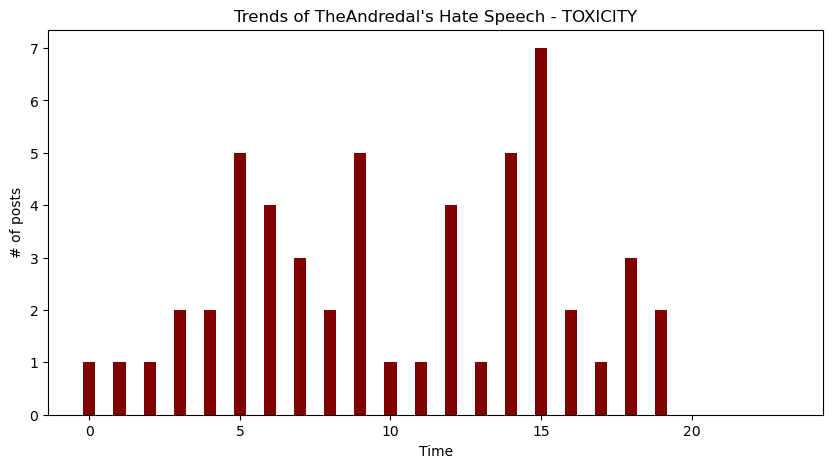

In [14]:
fig = plt.figure(figsize = (10, 5))
hour_array = np.array(sample_df_TheAndredal.groupby(['hr'])['hr'].count().values, dtype = int)
hour_array = np.append(hour_array, np.zeros(24 - len(hour_array))) 
print(len(hour_array))

# creating the bar plot
plt.bar(np.arange(24), hour_array, color ='maroon', width = 0.4)
 
plt.xlabel("Time")
plt.ylabel("# of posts")
plt.title("Trends of TheAndredal's Hate Speech - TOXICITY")
plt.show()

In [15]:
print(toxicity_df.groupby(['author'])['author'].count().sort_values(ascending=False))

author
TheAndredal      53
JohnKimble111    44
EricAllonde      34
Imnotmrabut      32
benderXX         29
                 ..
NewsinAsia        1
New-Grape2052     1
NesVier           1
Neroke2016a       1
zzzsoebre         1
Name: author, Length: 2160, dtype: int64


In [17]:
toxicity_df['converted_utc'] = [datetime.fromtimestamp(time) for time in toxicity_df['created_utc']]
toxicity_df['hr'] = [time.hour for time in toxicity_df['converted_utc']]


/var/folders/g5/xdhjt4td5773kjqgmt9__thr0000gn/T/ipykernel_8626/2213875088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxicity_df['converted_utc'] = [datetime.fromtimestamp(time) for time in toxicity_df['created_utc']]
/var/folders/g5/xdhjt4td5773kjqgmt9__thr0000gn/T/ipykernel_8626/2213875088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxicity_df['hr'] = [time.hour for time in toxicity_df['converted_utc']]


24


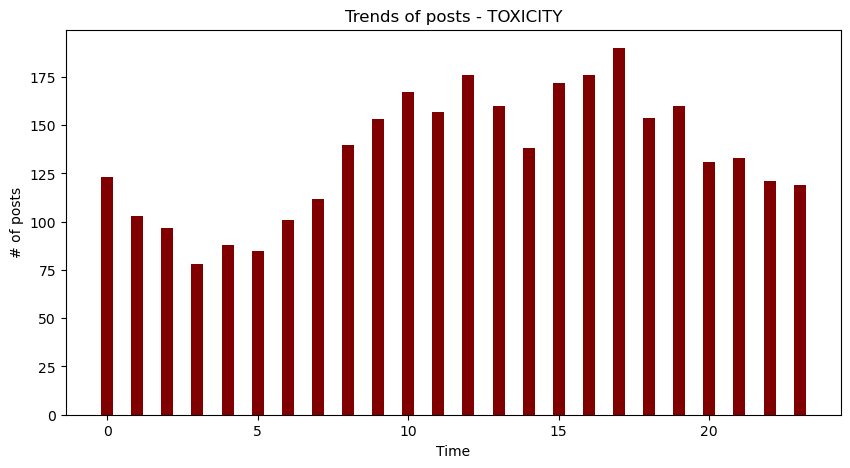

In [20]:
fig = plt.figure(figsize = (10, 5))
hour_array = np.array(toxicity_df.groupby(['hr'])['hr'].count().values, dtype = int)
hour_array = np.append(hour_array, np.zeros(24 - len(hour_array))) 
print(len(hour_array))

# creating the bar plot
plt.bar(np.arange(24), hour_array, color ='maroon', width = 0.4)
 
plt.xlabel("Time")
plt.ylabel("# of posts")
plt.title("Trends of posts - TOXICITY")
plt.show()

In [21]:
imported_data['converted_utc'] = [datetime.fromtimestamp(time) for time in imported_data['created_utc']]
imported_data['hr'] = [time.hour for time in imported_data['converted_utc']]



24


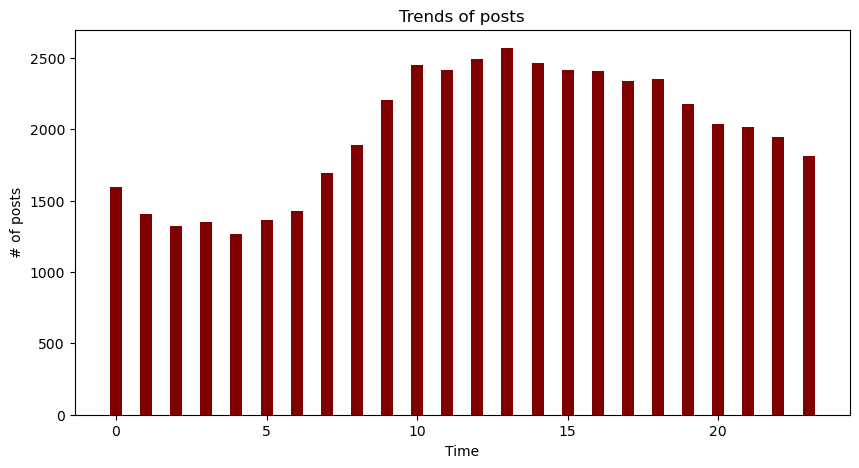

In [24]:
fig = plt.figure(figsize = (10, 5))
hour_array = np.array(imported_data.groupby(['hr'])['hr'].count().values, dtype = int)
hour_array = np.append(hour_array, np.zeros(24 - len(hour_array))) 
print(len(hour_array))

# creating the bar plot
plt.bar(np.arange(24), hour_array, color ='maroon', width = 0.4)
 
plt.xlabel("Time")
plt.ylabel("# of posts")
plt.title("Trends of posts")
plt.show()